In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [45]:
dataset = pd.read_csv('../Datasets/train.csv')
dataset = dataset.iloc[:,3:].values

In [46]:
dataset

array([[13],
       [11],
       [14],
       ...,
       [74],
       [62],
       [82]])

In [47]:
X = dataset[:1826,:]

In [48]:
X.shape

(1826, 1)

In [49]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(X)

In [50]:
training_set_scaled.shape

(1826, 1)

In [51]:
X_train_seq = []
y_train_seq = []
for i in range(60, 1826):
    X_train_seq.append(training_set_scaled[i-60:i, 0])
    y_train_seq.append(training_set_scaled[i, 0])
X_train_seq, y_train_seq = np.array(X_train_seq), np.array(y_train_seq)

In [52]:
X_train_seq.shape

(1766, 60)

In [53]:
y_train_seq.shape

(1766,)

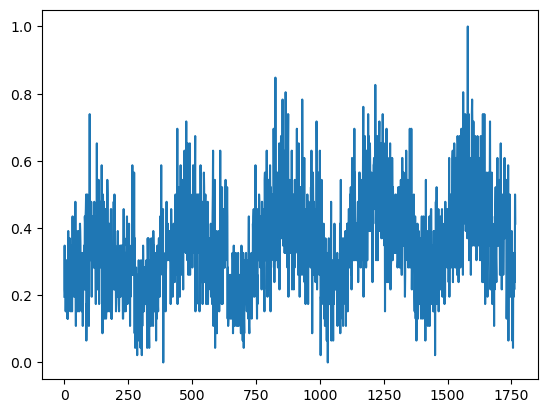

In [54]:
plt.plot(y_train_seq)
plt.show()

In [55]:
X_train_seq.shape

(1766, 60)

In [56]:
X_train_seq = np.reshape(X_train_seq, (X_train_seq.shape[0], X_train_seq.shape[1], 1))

In [57]:
X_train_seq.shape

(1766, 60, 1)

In [58]:
y_train_seq.shape

(1766,)

In [59]:
y_train_seq.shape

(1766,)

In [60]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [61]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train_seq.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train_seq.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train_seq.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

2023-10-31 11:01:10.981728: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-10-31 11:01:10.983348: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-10-31 11:01:10.983774: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [62]:
regressor.fit(X_train_seq, y_train_seq, epochs = 100, batch_size = 32)

Epoch 1/100


2023-10-31 11:01:11.265638: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-10-31 11:01:11.401186: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-10-31 11:01:11.401625: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-10-31 11:01:11.402178: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG IN

56/56 [==============================] - 4s 35ms/step - loss: 0.0255
Epoch 2/100
56/56 [==============================] - 2s 36ms/step - loss: 0.0167
Epoch 3/100
56/56 [==============================] - 2s 38ms/step - loss: 0.0161
Epoch 4/100
56/56 [==============================] - 2s 39ms/step - loss: 0.0163
Epoch 5/100
56/56 [==============================] - 2s 39ms/step - loss: 0.0154
Epoch 6/100
56/56 [==============================] - 2s 39ms/step - loss: 0.0157
Epoch 7/100
56/56 [==============================] - 2s 39ms/step - loss: 0.0162
Epoch 8/100
56/56 [==============================] - 2s 39ms/step - loss: 0.0160
Epoch 9/100
56/56 [==============================] - 2s 39ms/step - loss: 0.0156
Epoch 10/100
56/56 [==============================] - 2s 39ms/step - loss: 0.0154
Epoch 11/100
56/56 [==============================] - 2s 39ms/step - loss: 0.0154
Epoch 12/100
56/56 [==============================] - 2s 39ms/step - loss: 0.0151
Epoch 13/100
56/56 [=================

In [63]:
y_pred = regressor.predict(X_train_seq)

2023-10-31 11:04:51.843354: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-10-31 11:04:51.843881: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-10-31 11:04:51.844337: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

56/56 [==============================] - 1s 9ms/step


In [64]:
y_pred

array([[0.19925886],
       [0.18006097],
       [0.15844032],
       ...,
       [0.25945738],
       [0.28462264],
       [0.3052389 ]], dtype=float32)

In [65]:
y_train_seq

array([0.19565217, 0.34782609, 0.2173913 , ..., 0.23913043, 0.5       ,
       0.41304348])

In [66]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_train_seq, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.011377945794531615


In [67]:
y_pred = sc.inverse_transform(y_pred)

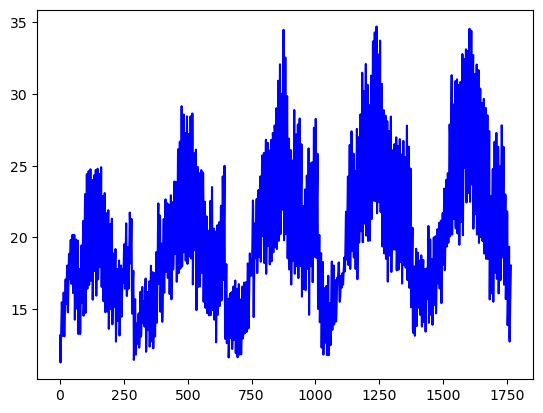

In [68]:
plt.plot(y_pred,color ='blue')
plt.show()

In [73]:
df = pd.read_csv('../Datasets/train.csv')
df = df.iloc[1826:3652,3:]
df

,sales
1826,12
1827,16
1828,16
1829,20
1830,16
...,...
3647,19
3648,21
3649,18
3650,24
